In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
df=pd.read_csv('Downloads/dataset.csv',header=None)

In [3]:
df

,0,1
0,-10.939341,-37.062742
1,-10.938346,-37.062588
2,-10.938666,-37.061499
3,-10.940389,-37.058291
4,-10.943048,-37.056201
...,...,...
805,-10.954810,-37.046018
806,-10.967224,-37.042973
807,-10.967745,-37.041569
808,-10.979221,-37.044164


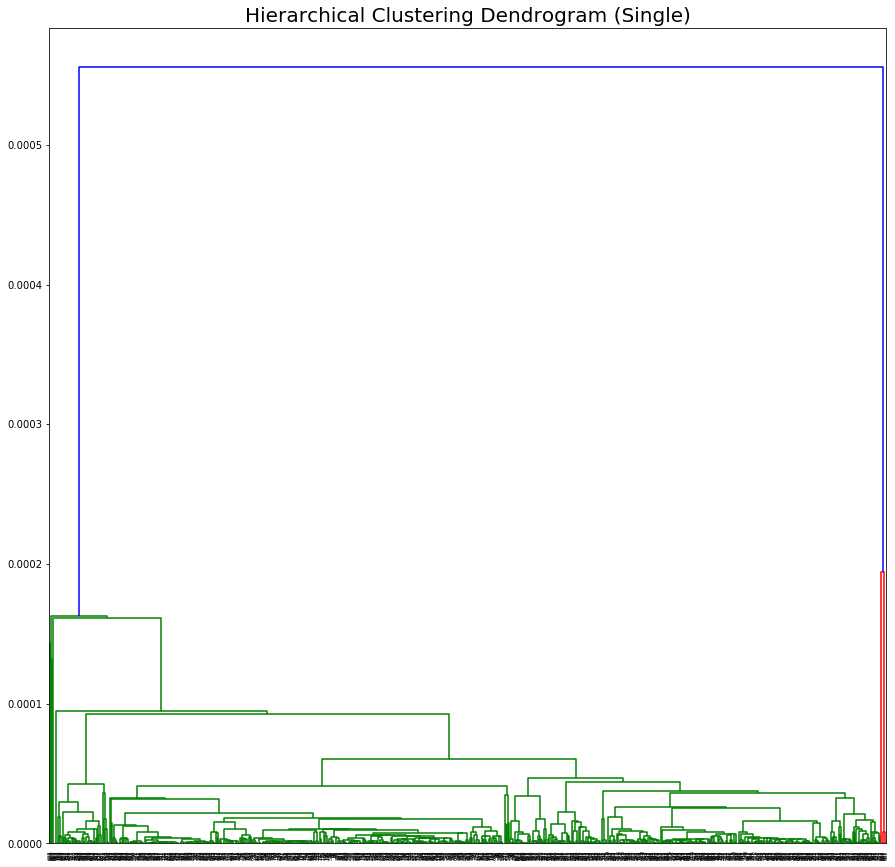

In [32]:
df = normalize(df)
linked = linkage(df, 'single')
plt.figure(figsize=(15, 15))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram (Single)', fontsize=20)
plt.show()

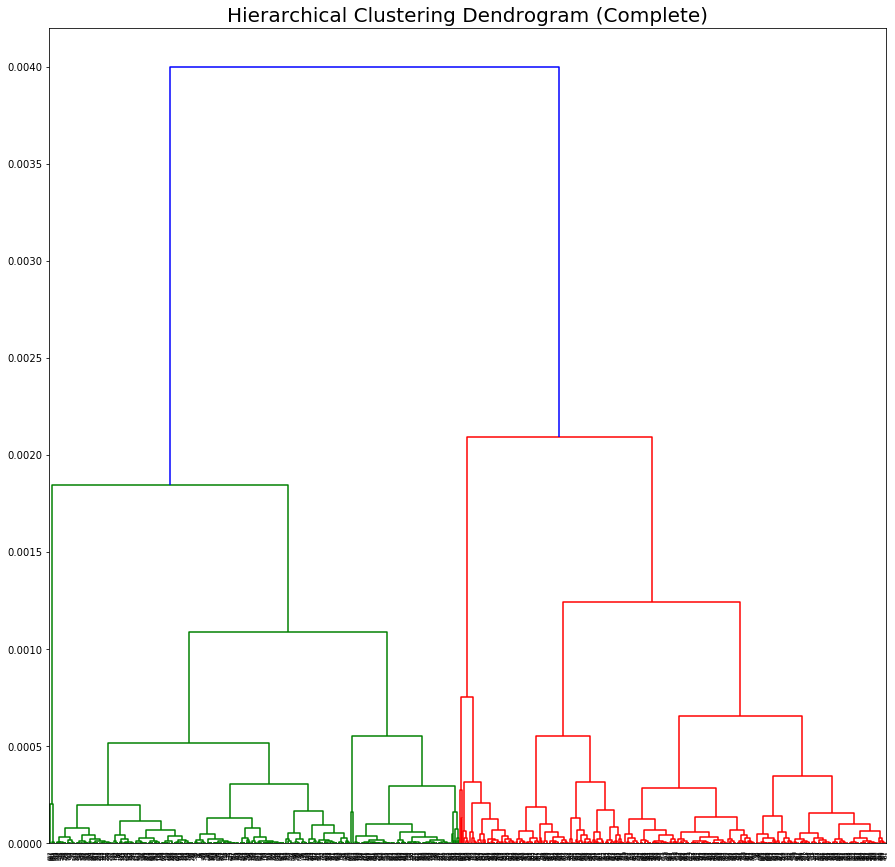

In [34]:
plt.figure(figsize=(15, 15))
dendrogram(linkage(df, 'complete'))
plt.title('Hierarchical Clustering Dendrogram (Complete)', fontsize=20)
plt.show()

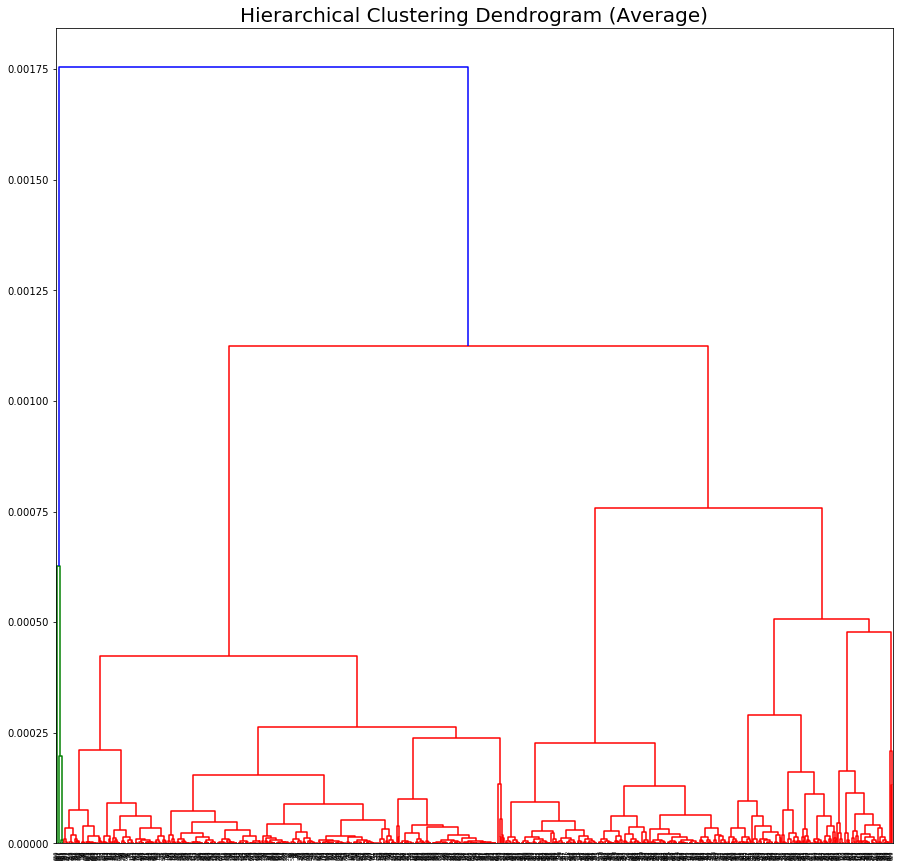

In [36]:
plt.figure(figsize=(15, 15))
dendrogram(linkage(df, 'average'))
plt.title('Hierarchical Clustering Dendrogram (Average)', fontsize=20)
plt.show()

In [6]:
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform
squareform(cophenet(linked))

array([[0.        , 0.00069311, 0.0009498 , ..., 0.00640621, 0.00640621,
        0.00640621],
       [0.00069311, 0.        , 0.0009498 , ..., 0.00640621, 0.00640621,
        0.00640621],
       [0.0009498 , 0.0009498 , 0.        , ..., 0.00640621, 0.00640621,
        0.00640621],
       ...,
       [0.00640621, 0.00640621, 0.00640621, ..., 0.        , 0.00489925,
        0.00489925],
       [0.00640621, 0.00640621, 0.00640621, ..., 0.00489925, 0.        ,
        0.00218404],
       [0.00640621, 0.00640621, 0.00640621, ..., 0.00489925, 0.00218404,
        0.        ]])

In [40]:
c1,coph=cophenet(linkage(df, 'single'),pdist(df))
c2,coph=cophenet(linkage(df, 'complete'),pdist(df))
c3,coph=cophenet(linkage(df, 'average'),pdist(df))
c4,coph=cophenet(linkage(df, 'weighted'),pdist(df))
c5,coph=cophenet(linkage(df, 'centroid'),pdist(df))
linkage=pd.DataFrame({"Linkage":['Single','Complete','Average','Weighted','Centroid'],
                    "Cophenet Coeff":[c1,c2,c3,c4,c5]})
linkage

,Linkage,Cophenet Coeff
0,Single,0.524391
1,Complete,0.714466
2,Average,0.761755
3,Weighted,0.556103
4,Centroid,0.761755


In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
db_index=[]
for i in range(2,8):
    db_index.append(davies_bouldin_score(df, AgglomerativeClustering(n_clusters=i,linkage='average').fit(df).labels_))
db_index = pd.DataFrame({'K Values':['2','3','4','5','6','7'],
                         'DB index':db_index})
print(db_index)
print('K value 5 is giving the optimum')

  K Values  DB index
0        2  0.371350
1        3  0.586426
2        4  0.484057
3        5  0.603345
4        6  0.528060
5        7  0.597076
K value 5 is giving the optimum


In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
db_index=[]
for i in range(2,8):
    db_index.append(silhouette_score(df, AgglomerativeClustering(n_clusters=i,linkage='average').fit(df).labels_))
db_index = pd.DataFrame({'K Values':['2','3','4','5','6','7'],
                         'Silhouette index':db_index})
print(db_index)
print('K value 4 is giving the optimum')

  K Values  Silhouette index
0        2          0.517281
1        3          0.328842
2        4          0.310421
3        5          0.403849
4        6          0.441463
5        7          0.438412
K value 4 is giving the optimum


In [21]:
dunn(AgglomerativeClustering(n_clusters=i,linkage='average').fit(df).labels_)

TypeError: object of type 'numpy.int64' has no len()

In [19]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)

def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di
    
    
def  big_s(x, center):
    len_x = len(x)
    total = 0
        
    for i in range(len_x):
        total += np.linalg.norm(x[i]-center)    
    
    return total/len_x

def davisbouldin(k_list, k_centers):
    """ Davis Bouldin Index
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    k_centers : np.array
        The array of the cluster centers (prototypes) of type np.array([K, p])
    """
    len_k_list = len(k_list)
    big_ss = np.zeros([len_k_list], dtype=np.float64)
    d_eucs = np.zeros([len_k_list, len_k_list], dtype=np.float64)
    db = 0    

    for k in range(len_k_list):
        big_ss[k] = big_s(k_list[k], k_centers[k])

    for k in range(len_k_list):
        for l in range(0, len_k_list):
            d_eucs[k, l] = np.linalg.norm(k_centers[k]-k_centers[l])

    for k in range(len_k_list):
        values = np.zeros([len_k_list-1], dtype=np.float64)
        for l in range(0, k):
            values[l] = (big_ss[k] + big_ss[l])/d_eucs[k, l]
        for l in range(k+1, len_k_list):
            values[l-1] = (big_ss[k] + big_ss[l])/d_eucs[k, l]

        db += np.max(values)
    res = db/len_k_list
    return res